<a href="https://colab.research.google.com/github/Sneha123-zudo/Machine-Learning---Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SIMPLE LINEAR REGRESSION MODEL**

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [108]:
df = pd.read_csv('/content/drive/MyDrive/placement (1).csv')

In [109]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


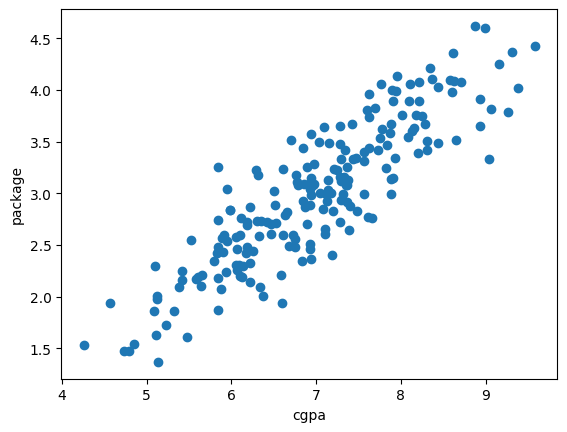

In [110]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [111]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [113]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [114]:
lr.fit(X_train, y_train)

LinearRegression()

In [115]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [116]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [117]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [118]:
lr.intercept_

np.float64(-0.8961119222429144)

In [119]:
lr.coef_

array([0.55795197])

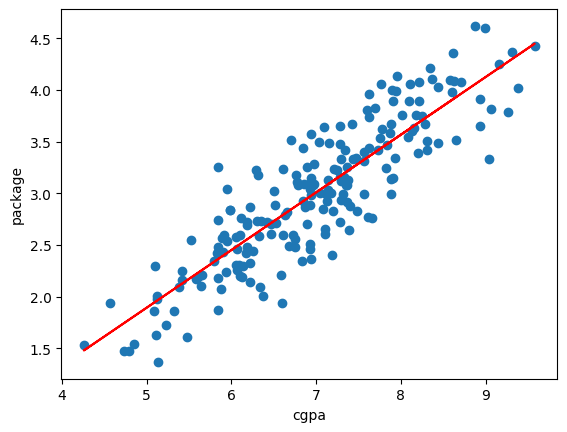

In [120]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

In [121]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred = lr.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.780730147510384
MAE: 0.2884710931878175
RMSE: 0.34827051717731616


**MULTIPLE LINEAR REGRESSION**

In [122]:
from sklearn.datasets import make_regression
import plotly.express as px
import plotly.graph_objects as go

In [123]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [124]:
df = pd.DataFrame({'feature1': X[:,0], 'feature2':X[:,1], 'target':y})

In [125]:
df.shape

(100, 3)

In [126]:
df.head()

,feature1,feature2,target
0,-0.122149,-0.059090,50.522330
1,-0.906957,0.479137,-102.539585
2,1.735089,-0.083352,101.075618
3,0.133747,1.180606,24.139699
4,0.020354,-0.471465,14.634857


In [74]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')
fig.show()

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [128]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [129]:
lr.fit(X_train, y_train)

LinearRegression()

In [130]:
y_pred = lr.predict(X_test)

In [131]:
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.6638445120381904
MAE: 35.364202251452404
RMSE: 42.00148119271035


In [132]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)

z = z_final

In [81]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()

In [133]:
lr.coef_

array([55.03920725,  9.9802061 ])

In [134]:
lr.intercept_

np.float64(2.7958755903338086)

**Polynomial Regression**

In [135]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [136]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

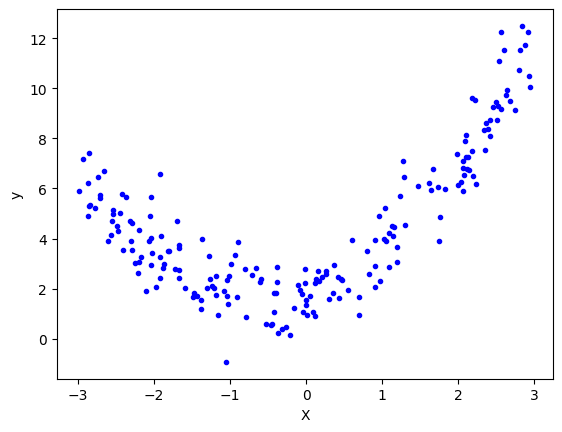

In [137]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [139]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)

LinearRegression()

In [140]:
y_pred = Lr.predict(X_test)

In [141]:
print("R2 Score:", r2_score(y_test,y_pred))

R2 Score: 0.4222760322500937


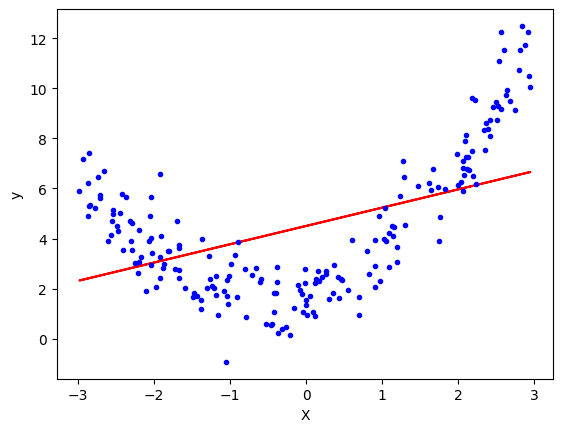

In [142]:
plt.plot(X_train, Lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [143]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
print(X_train[0])
print(X_train_trans[0])

[2.17644923]
[1.         2.17644923 4.73693125]


In [144]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
LinearRegression()
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.90716859254557

In [145]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.86589605 0.81691431]]
[1.92383282]


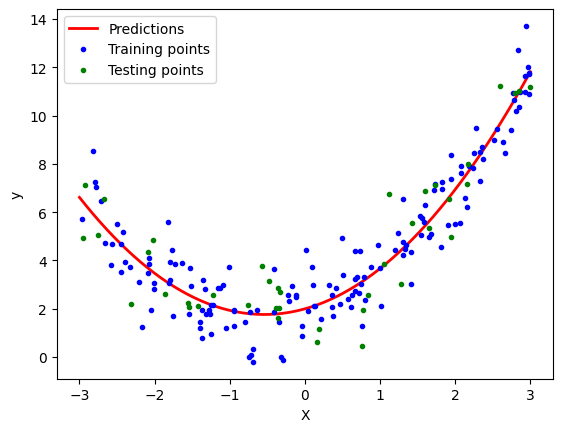

In [95]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [146]:

def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1120: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce



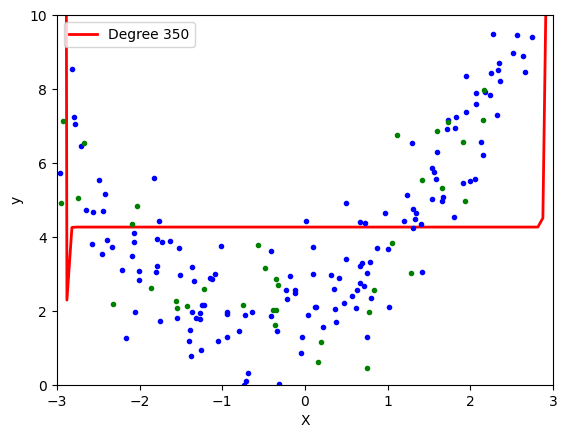

In [97]:
polynomial_regression(350)

In [147]:
poly.powers_

array([[0],
       [1],
       [2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



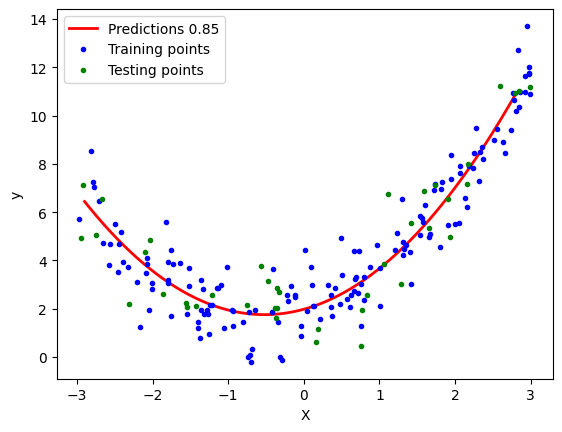

In [99]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [148]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

In [149]:
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

In [102]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [103]:
X_multi = np.array([x,y]).reshape(100,2)
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [

In [104]:
X_multi_trans.shape

(100, 496)

In [105]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [106]:
X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10,10)
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

